# Overview

In this notebook we examine several normalization techniques.

The material is divided into the following parts:
1. What Is Normalization
2. When And Why Is Normalization Used
3. Load Example Data
4. Summary Normalization Techniques
5. Standardization
6. Min-Max (linear) Scaling
7. Quantile Normalization
8. Rank (Linear Interpolation)

# 1. What is Normalization
Depending on our frame of reference and our field of mathematics, normalization can take on different meanings. Generally speaking, normalization refers to a transformation which renders data "normal" but as we will see, "normal" has a number of definitions and implications.

Figuratively speaking, "normal" means demonstrating characteristics; consistent with historical observations; consistent with expectations; consistent with similar observations under similar circomstances; etc/

In terms of a literal meaning for the term "normal", there is a history which explains the origins for different meanings. Generally speaking, becuase of the law of large numbers, one of the widest interpretations of the term "normal" refers to the normal distribution (ie. things having characteristics of a normal distribution). That being said there are a number of alternate meanings which have important places in Exploratory Data Analysis (EDA). We will examine some of these interpretations and techniques.

With machine learning, the reason for normalization/standardization is fairly consistent: variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. 

# 2. When And Why Is Normalization Used?
## 2.1. Normalization Assists Exploratory Data Analysis (EDA)
Counterintuitively, normalization is a useful tool for examining differences between data. We try to make things look the same with respect to certain characteristics and examine the effects on other characteristics. The normalization transformations will allow us to isolate or ignore certain characteristics of our data so that we can focus on the important characteristics.

Some common areas of interest include:

- The scale of our data
- The descriptive statistical properties (like mean and std deviation)
- The shape of our data
- The order or rank of our data

## 2.2. Normalization Is A Prerequisite For Certain Mathematical Models

Normalization also comes in handy when doing machine learning. As we will see, some models or algorithms are designed according to certain assumptions. Some of these are assumed a priori as a way of mathematically symplifying the closed form solution while others are adopted coincidentally due to limitations of a particular mathematical framework.

# 3. Load and Examine Sample Data
The best way to understand these techniques to get our hands on some example data.

For this notebook we will be reviewing test scores. A group of students have recorded marks for their ACT, Final Exam, Quiz Average, and Test Average. All of these tests are recorded using different units and scales.

In [15]:
# Load our libraires
import pandas
import numpy
import matplotlib.pyplot as pyplot

# Load our sample data
input_file_path = "../Example Data Sets/Test Scores.csv"
delimiter = ","
df = pandas.read_csv(input_file_path, delimiter=delimiter)

from IPython.display import display_html 
df1_styler = df.style.set_table_attributes("style='display:inline'").set_caption('Data')
df2_styler = df.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
5,24,103,61,57
6,25,150,81,76
7,29,147,86,76
8,36,181,98,102
9,26,163,72,70


Digging a little bit deeper, we can examine the histograms for the distributions of our test scores:

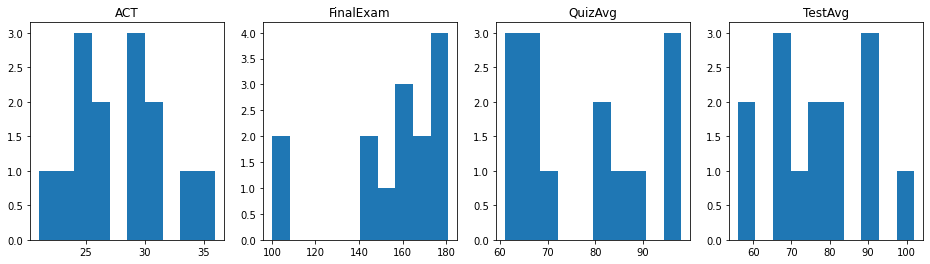

In [4]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
df["ACT"].plot(ax=ax[0], kind="hist", title="ACT");
ax[0].set_ylabel("")
df["FinalExam"].plot(ax=ax[1], kind="hist", title="FinalExam");
ax[1].set_ylabel("")
df["QuizAvg"].plot(ax=ax[2], kind="hist", title="QuizAvg");
ax[2].set_ylabel("")
df["TestAvg"].plot(ax=ax[3], kind="hist", title="TestAvg");
ax[3].set_ylabel("");

# 4. Review Normalization Techniques
There are a number or normalization techniques we will review in this notebook:

1. **Standardization** - Transforming distributions to have standard normal parameters $(\mu=0, \sigma=1)$ which adjusts them to a similar scale or size
2. **Min-Max (linear) Scaling** - Transformind distributions to have a unit range $(max = 1, min = 0)$
3. **Quantile Normalization** - Transforming distributions to have the similar if not equivalent statistical properties $( \mu, \sigma, min, max, quantiles)$
4. **Rank-Scaling (Linear Interpolation)** -
5. Standard deviation method: https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html



I have created the following table to compare them in an effort to help explain they why/when question:

<table>
    <tr>
        <th>Characteristic</th>
        <th>Standardization</th>
        <th>Min-Max Scaling</th>
        <th>Quantile Normalization</th>
    </tr>
    <tr>
        <td style="text-align:center">Changes Data Shape</td>
        <td style="text-align:center">No</td>
        <td style="text-align:center">No</td>
        <td style="text-align:center">Yes, but preserves order.</td>
    </tr>
    <tr>
        <td style="text-align:center">Changes Moments</td>
        <td style="text-align:center">$\mu=0, \sigma=1$</td>
        <td style="text-align:center">$\mu, \sigma \in [0.1]$</td>
        <td style="text-align:center">$\mu_1 = \mu_2 = \mu_n$, $\sigma_1 = \sigma_2 = \sigma_3$ </td>
    </tr>
    <tr>
        <td style="text-align:center">Changes Quantiles</td>
        <td style="text-align:center">Yes, Scale not Rank</td>
        <td style="text-align:center">Yes, Scale not Rank</td>
        <td style="text-align:center">Yes</td>
    </tr>
    <tr>
        <td style="text-align:center">Suports Different Units Of Measure</td>
        <td style="text-align:center">Yes</td>
        <td style="text-align:center">Yes</td>
        <td style="text-align:center">Yes</td>
    </tr>
    <tr>
        <td style="text-align:center">Limits Range</td>
        <td style="text-align:center">No</td>
        <td style="text-align:center">[0, 1]</td>
        <td style="text-align:center">Between extremes of all data sets</td>
    </tr>
</table>


When we are thinkign about which method to apply we can ask ourselves: 
- Does our data have the same or comparable units of measure
- Is our data on the same scale
- Do we care about statistical properties like mean and std deviation
- Do we care about shape?

## 5. Standardization

## 5.1. Prerequisite Reading
The term standardization is figuratively derived from the concept of "standard weights and measures": when we measure a quantity, we measure it in standard units that we have established as a frame of reference. 

The normal distribution family is the set distributions with a symetric bell shape. The standard normal distribution, sometimes called the z distribution, is the normal distribution with a mean of zero and a standard deviation of one. 
There was some contentions about which normal distrubtion should be referred to as the standard one. From the standpoint of simplicity there are several alternate proposals which yield a simpler probability density function which changes to the standard deviation. More on this can be found [here](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

That being said, the generally accepted standard normal distribution has desirable statistical properties. As it was being applied to scientific experiments and hypothesis testing, the scientists were measuring deviations between the observed data points in an experiment and those proposed by the hypothesis. As such, having a distribution oriented around the origin lent itself well to the task. Deviations can be positive or negative, and a small deviation, or one close to zero, is preferable. The distribution naturally fits the problem. Another interesting fact is that the combination of two normal distributions also produces a normal distribution; if the two distributions are standard normal, the resulting distribution will also be standard normal. So the distribution is very maleable and allows us to combine and subdivide samples. Lastly, about 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean; about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations. If the sample data is sufficiently normal, this will hold through the transformation; if not, it may not.

## 5.2. What Is Standardization
Standardization it the process of adjusting a distribution so that it is a standard normal distribution. This means that the transformed distribution is such that $\mu=0, \sigma=1$.

The transofmration is made by calculaing a "z-score" $z$ for every point $x$ in a data set:

$$ z = \frac{x-\mu}{\sigma} $$

There are two (non-rigid) transformations being applied here. We see with the numerator that we are adding a constant to every term in the data set. This will result in a translation of the data set; because the "shift term" is $\mu$ (the mean) it moves the data to the origin; if we used a different shift term we could move the distribution to some other location. We see wit the denominator that we are dividing every point in a dataset by a constant. This will result in a dilation (stretch or shrinking) of the set. Because the stretching term is $\sigma$ (the standard deviation) it has a similar effect as the numerator; the range of values is scaled such that the standard deviation is one.

So in short, addition and division (a type of addition) are being applied. An interesting feature of this z-transformation is that it does not change the shape of the original distirbution. Is merely adjusts the relative sizes of different distributions so that they their shapes can be compared on the same relative scale. In our example we will see the effect to our test scores.

## 5.3. How and Why Is Standardization Used

Standardization is uesful when we want to compare data with different scales or different units of measurement.

In our example, the ACT and the Quiz scores operate on different scales/units which is problematic for the following reasons:
1. It's hard to compare the performance of a single student using different scores: Eg. Is a 26 ACT score better than a 149 on the final exam?
2. Its hard to compare the student's performance relative to the group. Eg. A student is farther away from the mean of his class mates on the final exam than the ACT, is that bad?
3. It's hard to compare groups across scores. Eg. Did this group perform as well? Is a 26 average ACT score better than a 149 average on the final exam?

Standardizing the data will allow us to look at the distribution despite the different scale/unit. With standardization the data is converted to use a standard scale: number of standard deviations from the mean, which is unitless. This allows us to make direct comparison between the date (although discretization may have an impact, lets ignore it for now).

For example, we can see below that student 0 is 1.27$\sigma$ from the ACT mean and 0.94$\sigma$ from the Final Exam mean. Even though the scores are diferent, we can see that the student did better on the ACT as his score is disproportionatley higher than that on the Final Exam. 

Another important chatacteristic of standardization is that the transformation will preserve the shape of our data. The extremes will remain extremes, the relative groupings will remain grouped. We can see a partial proof [here](https://www.quora.com/Why-doesnt-a-sets-standard-deviation-change-when-we-increase-each-term-by-a-number-A?share=1).

Looking at the Normalized Final Exam we can see that two students did really bad. And their poor marks were some of the worst marks. They did worse on the Final Exam than they did on the other tests.

Asside from EDA, standardization also has applications in machine learning and feature engineering. With machine learning some algorithms are based on euclidean distance and are sensitive to the scale of a variable relative to another. As such we may get spurious results if we do not standardize the data (our features).

## 5.4. Examine The Effects Of Standardization

### 5.4.1. Examine The Effects on Scale and Statistics
Looking at the z-scores we see the data is naturally describing the student relative to the class. Positive scores being good, negative scores being bad. We can now go row by row and see that student 0 consistently performed better than the average student while, and better than student 4 who was also consistently in the top half of the class.

In [5]:
zscore_df = df.copy()
zscore_df["ACT"] = ( df["ACT"] - df["ACT"].mean() ) / df["ACT"].std()
zscore_df["FinalExam"] = ( df["FinalExam"] - df["FinalExam"].mean() ) / df["FinalExam"].std()
zscore_df["QuizAvg"] = ( df["QuizAvg"] - df["QuizAvg"].mean() ) / df["QuizAvg"].std()
zscore_df["TestAvg"] = ( df["TestAvg"] - df["TestAvg"].mean() ) / df["TestAvg"].std()

from IPython.display import display_html 
df1_styler = df.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = zscore_df.head().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
,ACT,FinalExam,QuizAvg,TestAvg
0,1.270931,0.940813,1.304131,0.952737
1,0.790038,0.481346,0.285766,0.952737
2,-1.614426,0.749368,-0.878080,-0.638767
3,-0.652640,0.940813,-0.805340,1.028523


Looking at the descriptive statistics, we can see the mean is indeed about 0 while the std deviation is about 1.

In [16]:
from IPython.display import display_html 
df1_styler = df.describe().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = zscore_df.describe().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000
mean,27.714286,156.428571,77.071429,76.428571
std,4.158931,26.117234,13.747527,13.195071
min,21.000000,100.000000,61.000000,56.000000
25%,25.000000,147.750000,65.000000,68.000000
50%,27.500000,163.000000,76.500000,76.000000
75%,30.500000,174.250000,88.250000,87.000000
max,36.000000,181.000000,98.000000,102.000000
,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000


### 5.4.2. Examine The Effects On Shape


Looking at the distributions we see that the shape of our data is preserved. The relative distances have been scaled as have the individual data points.

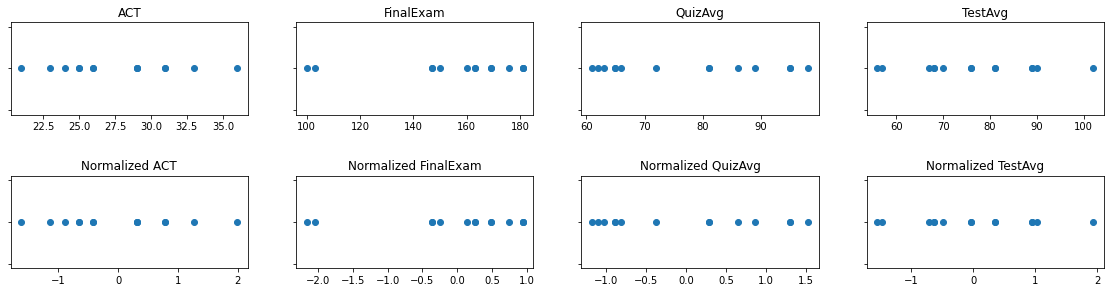

In [7]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    ax[0, i].scatter(df[column], numpy.zeros(df[column].shape));
    ax[0, i].set(yticklabels=[])
    ax[0, i].set_title(column)
    
    ax[1, i].scatter(zscore_df[column], numpy.zeros(zscore_df[column].shape));
    ax[1, i].set(yticklabels=[])
    ax[1, i].set_title("Normalized " + column)


The histograms show similar infomation about the preservation of shape:

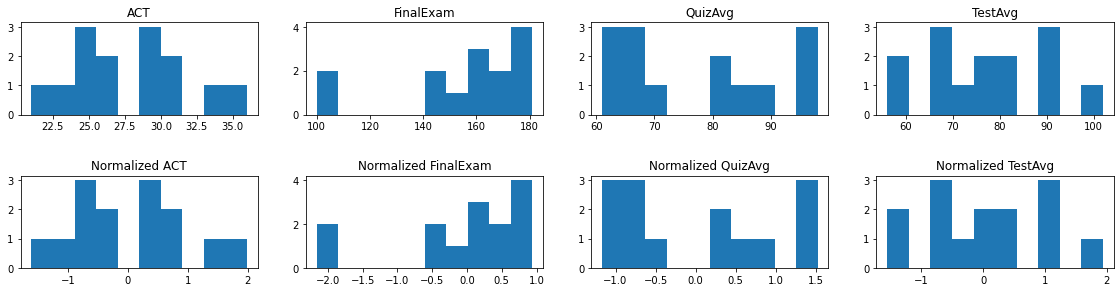

In [8]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    
    df[column].plot(ax=ax[0, i], kind="hist", title=column);
    ax[0, i].set_ylabel("")

    zscore_df[column].plot(ax=ax[1, i], kind="hist", title="Normalized " + column);
    ax[1, i].set_ylabel("") 

Another way to confirm this is by looking at the QQ plots for the two samples. A $45^\circ$ line indicates identical distribution shapes

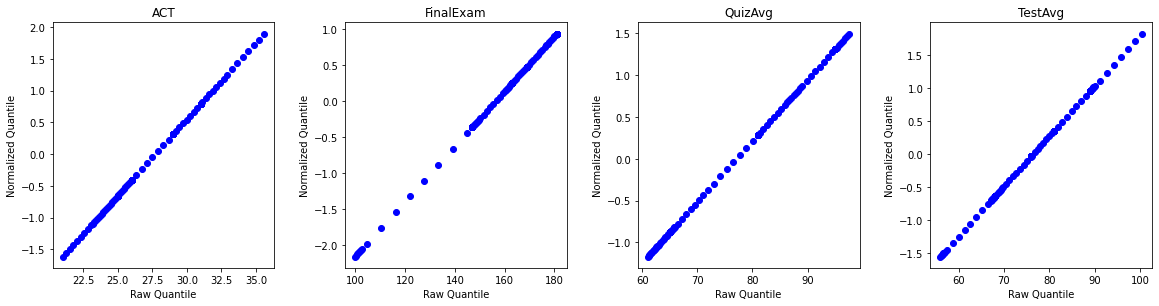

In [14]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)
fig.tight_layout(w_pad=4)

for i in range(0, 4):
    
    column_name = df.columns[i]
    raw = df[column_name]
    normalized = zscore_df[column_name]
    
    for q in [x / 100 for x in range(0, 100)]:
        raw_quantile = numpy.quantile(raw, q)
        normalized_quantile = numpy.quantile(normalized, q)
        ax[i].scatter(raw_quantile, normalized_quantile, c="blue")
        
    ax[i].set_title(column_name)
    ax[i].set_xlabel("Raw Quantile")
    ax[i].set_ylabel("Normalized Quantile")

## 6. Min-Max (Linear) Scaling
Like a z-score, the Min-Max Scaling term is the result of two linear transformations. Min-Max scaling also uses a shift term and a stretch term. Unlike standardization it will map an arbitrary unbounded interval to a bounded interval.

## 6.1 Prerequisite Reading

## 6.2 What is Min-Max Scaling
The equation is given as:

$$ m = \frac{x - x_{min}}{x_{max} - x_{min}} $$ 

The resulting value is such that $m \in [0,1]$.

It is important to note that this equation is highly sensitive to the min amd max of a sample (and thus outliers). If data is not properly cleaned the transformed sample is going to be bias in favor of the outlier. This will likely have a negative effect on the predictive power of any machine learning models.

## 6.3 How and Why Is Min-Max Scaling Used

As the defining feature of Min-Max Scaling is that it maps an arbitrary interval onto a finite (unit) interval. A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

As we will see, the Min-Max Scaling will impact the standard deviation of the distributions in an inconsistent manner. This means that Min-Max scaling should not be used for analysis techniques or machine learning algorithms that are based on distance (deviation). This includes PCA, SVM, k-means, etc.

Scale-invariant models howeve can tolerate data that has been Min-Max Scaled. This includes tree-based learning algorithms for example.

## 6.4 Examine The Effects Of Min-Max Scaling


### 6.4.1. Examine The Effects on Scale and Statistics

In [17]:
minmax_df = df.copy()
minmax_df["ACT"] = (df["ACT"] - df["ACT"].min()) / (df["ACT"].max() - df["ACT"].min())
minmax_df["FinalExam"] = (df["FinalExam"] - df["FinalExam"].min()) / (df["FinalExam"].max() - df["FinalExam"].min())
minmax_df["QuizAvg"] = (df["QuizAvg"] - df["QuizAvg"].min()) / (df["QuizAvg"].max() - df["QuizAvg"].min())
minmax_df["TestAvg"] = (df["TestAvg"] - df["TestAvg"].min()) / (df["TestAvg"].max() - df["TestAvg"].min())

from IPython.display import display_html 
df1_styler = df.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = minmax_df.head().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
,ACT,FinalExam,QuizAvg,TestAvg
0,0.800000,1.000000,0.918919,0.717391
1,0.666667,0.851852,0.540541,0.717391
2,0.000000,0.938272,0.108108,0.260870
3,0.266667,1.000000,0.135135,0.739130


In [18]:
from IPython.display import display_html 
df1_styler = df.describe().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = minmax_df.describe().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000
mean,27.714286,156.428571,77.071429,76.428571
std,4.158931,26.117234,13.747527,13.195071
min,21.000000,100.000000,61.000000,56.000000
25%,25.000000,147.750000,65.000000,68.000000
50%,27.500000,163.000000,76.500000,76.000000
75%,30.500000,174.250000,88.250000,87.000000
max,36.000000,181.000000,98.000000,102.000000
,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000


### 6.4.2. Examine The Effects On Shape
We see that the shape is preserved:

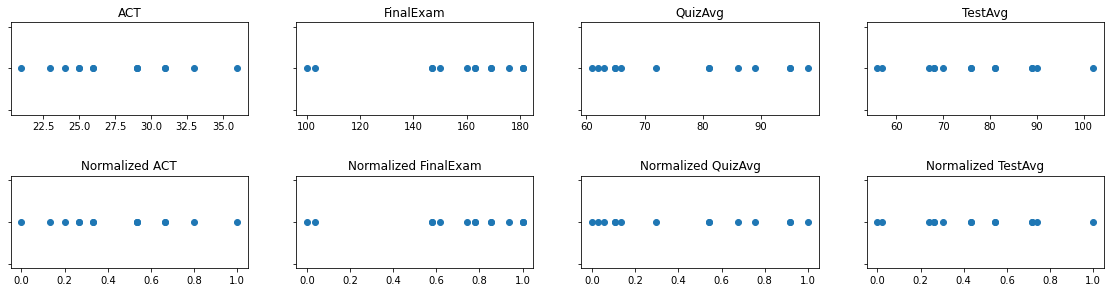

In [20]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    ax[0, i].scatter(df[column], numpy.zeros(df[column].shape));
    ax[0, i].set(yticklabels=[])
    ax[0, i].set_title(column)
    
    ax[1, i].scatter(minmax_df[column], numpy.zeros(minmax_df[column].shape));
    ax[1, i].set(yticklabels=[])
    ax[1, i].set_title("Normalized " + column)

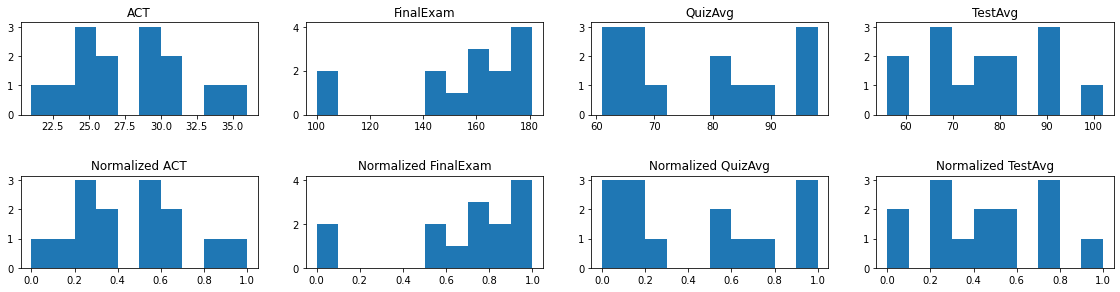

In [21]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    
    df[column].plot(ax=ax[0, i], kind="hist", title=column);
    ax[0, i].set_ylabel("")

    minmax_df[column].plot(ax=ax[1, i], kind="hist", title="Normalized " + column);
    ax[1, i].set_ylabel("") 

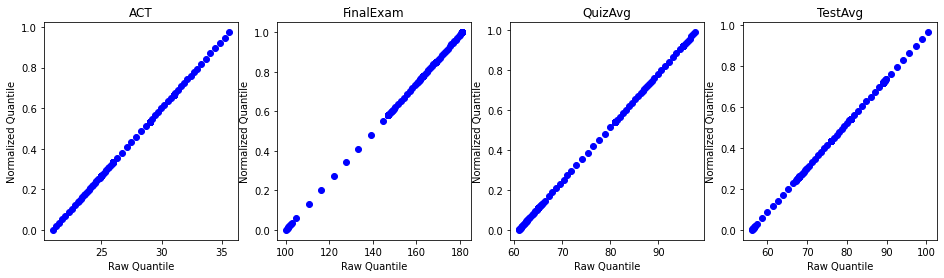

In [22]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)

for i in range(0, 4):
    
    column_name = df.columns[i]
    raw = df[column_name]
    normalized = minmax_df[column_name]
    
    for q in [x / 100 for x in range(0, 100)]:
        raw_quantile = numpy.quantile(raw, q)
        normalized_quantile = numpy.quantile(normalized, q)
        ax[i].scatter(raw_quantile, normalized_quantile, c="blue")

    ax[i].set_title(column_name)
    ax[i].set_xlabel("Raw Quantile")
    ax[i].set_ylabel("Normalized Quantile")

#### 6.4.2.1. Effects On Standard Deviation
One of the first things to notice about min-max scaling is the effects on the standard deviation.

The standard deviation will generally be smaller than one (assuming the range occupied a larger interval than [0, 1]). As a result, Min-Max Scaling will yield a data set with a smaller standard deviation than the original sample and the standardized sample.

In [130]:
tmp = pandas.DataFrame({
    "Raw": df.std(),
    "Standardized": zscore_df.std(),
    "Min-Max Scaled": minmax_df.std(),
    "Quantile Normalized": qnorm_df.std()
})
tmp.style.set_caption('Standard Deviation')


,Raw,Standardized,Min-Max Scaled,Quantile Normalized
ACT,4.158931,1.000000,0.277262,13.661378
FinalExam,26.117234,1.000000,0.322435,13.654514
QuizAvg,13.747527,1.000000,0.371555,13.703894
TestAvg,13.195071,1.000000,0.286849,13.689853


Min-Max scaling however does not intentionally consider standard deviation; no where in the equation so we see the $\sigma$ term. As a result it has impacts which may not be self evident.

The relative relations between standard deviations of different data sets are not preserved; samples with largest/smallest standard deviation may not have the same traits when normalized with min max scaling. See the Final Exam score in the table above for example. The raw Final Exam score data has the largest standard deviation which is about 6 times the size of the ACT score. On the contrary, the Min-Max scaled Final Exam score does not have the largest standardization and is only about 1.2 times the size of the ACT score. 

Recall that Min-Max scaling is bounded. We are squeezing arbitratry ranges of data into a uniform finite interval. Beause of this, some data sets may be transformed non-uniformally (more "squeezed" or stretched) than others in order to fit into the interval [0, 1]. 

Because the standard deviation shrinks, the data is relatively closer to the mean. **This effect supresses the effect of outliers.** Numerically speaking; the outliers look less like outliers because their distance from the mean is shrunk to a scale such that the difference between it and other points is negligable.

As a result, when training models on this type of data, it can lead to overfitting with models sensitive to linear distance. Recall that overfitting is when a model is trained to fit a data point that is unusual, or irregular, and thus the model will make unusual or irregular predictions. Because Min-Max scaling is supressing the information that distinguishes outliers from normal data, the model will think the outliers represent the real state and base its predictions on that.

# 7. Quantile Normalization

## 7.1. Prequisite Reading
Quantile normalization is based on quantiles so it is recommended to be familiar with the concept. For a review see the [Quantiles](Quantiles.ipynb) notebook. In short a quantile is a uniform "slice" of a data set which groups neighboring terms. For example we can divide a distribution into 100 partitions such that every partition has the same number of points; this is a special quantile called a percentile.

## 7.2. What Is Quantile Normalization
The purpose of quantile normalization is to try and compare apples to apples when given a banana and an orange. The basic idea is to divide the samples into an equal number of quantiles and then compare the values accross quantiles.

<center><img src="Quantile Normalization.png" width="600px"/></center>

It will shift the sample data points so be within the same relative neighborhood but it will not change the order ot the points in the distribution. With this tranformation we can get an understanding of experiment/trial error

## 7.3 How and Why Is Quantile Normalization Used

A common application of quantile normalization is to remove unwanted bias introduced by technical variations and thus reducing MSE. An example would be in an experiment where an observation is made using equipment with a varying degree of accuracy (a fairly common scenario in lab work). We can quantile normalize the observations which will render the bias from individual machines insignificant (see diagram above).

An important assumption with QNorm is that it assumes the distributions of the samples are identical. In the example above, lab work, the observations should be consistent. By forcing the data from numerous samples to be the same distribution we can look for statistically significant changes in rank.

Another application is when we would like our data to resemble another distribution. For example, many machine learning algorithms require, or perform better, when the data have a standard probability distribution (eg. normal or a uniform distribution). This transform provides an mechanizm to transform data in such a way that we maximize the effectiveness of our model.

## 7.4. Examine The Effects Of Quantile Normalization

### 7.4.1. Examine The Effects on Scale and Statistics

In [42]:
from collections import OrderedDict
def normalize_quantiles(df):
    
    # Compute the row means
    d = {}
    for column_name in df.columns:
        d.update({column_name : df[column_name].sort_values().array})
    sorted_df = pandas.DataFrame(d)   
    sorted_df_row_means = sorted_df.mean(axis = 1).tolist()
        
    # For each column, compute the rank, and replace it with the corresponding row mean
    tmp = df.copy().astype(float)
    for column_name in df.columns:
        # Compute the rank for each element
        column_element_ranks = numpy.searchsorted(df[column_name].sort_values().array, df[column_name])    
        # Replace the elemenet rank with the coresponding row mean
        column = df[column_name]
        for i in range(0, len(column)):
            element = column[i]
            element_rank = column_element_ranks[i]
            num_of_elements_with_same_rank = len([e for e in column if e == element])
            row_means_to_average = sorted_df_row_means[element_rank:element_rank+num_of_elements_with_same_rank]
            mean_row_mean = numpy.mean(row_means_to_average)
            tmp[column_name][i] = mean_row_mean
    tmp.index = df.index
    return tmp     

qnorm_df = normalize_quantiles(df)

from IPython.display import display_html 
df1_styler = df.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = qnorm_df.head().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
,ACT,FinalExam,QuizAvg,TestAvg
0,99.750000,101.000000,99.375000,97.625000
1,97.625000,90.625000,88.625000,97.625000
2,59.500000,96.250000,76.625000,76.625000
3,76.625000,101.000000,80.500000,99.750000


In [43]:
from IPython.display import display_html 
df1_styler = df.describe().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = qnorm_df.describe().style.set_table_attributes("style='display:inline'").set_caption('Normalized Data')
display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000
mean,27.714286,156.428571,77.071429,76.428571
std,4.158931,26.117234,13.747527,13.195071
min,21.000000,100.000000,61.000000,56.000000
25%,25.000000,147.750000,65.000000,68.000000
50%,27.500000,163.000000,76.500000,76.000000
75%,30.500000,174.250000,88.250000,87.000000
max,36.000000,181.000000,98.000000,102.000000
,ACT,FinalExam,QuizAvg,TestAvg
count,14.000000,14.000000,14.000000,14.000000


### 7.4.2. Examine The Effects On Shape
We see that the shape is not preserved (but rank is):

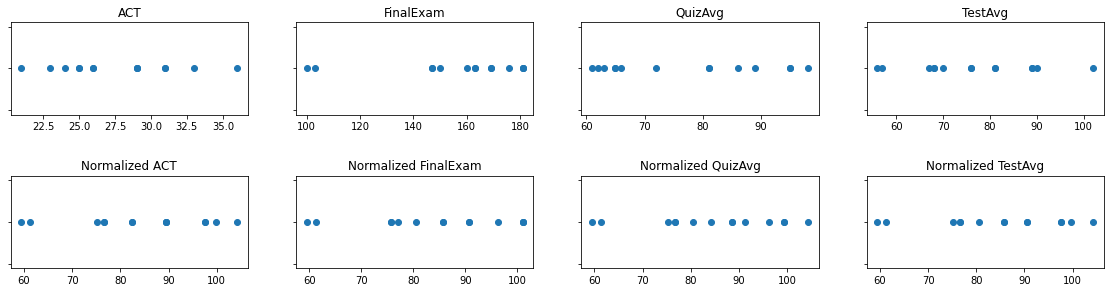

In [36]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    ax[0, i].scatter(df[column], numpy.zeros(df[column].shape));
    ax[0, i].set(yticklabels=[])
    ax[0, i].set_title(column)
    
    ax[1, i].scatter(qnorm_df[column], numpy.zeros(qnorm_df[column].shape));
    ax[1, i].set(yticklabels=[])
    ax[1, i].set_title("Normalized " + column)

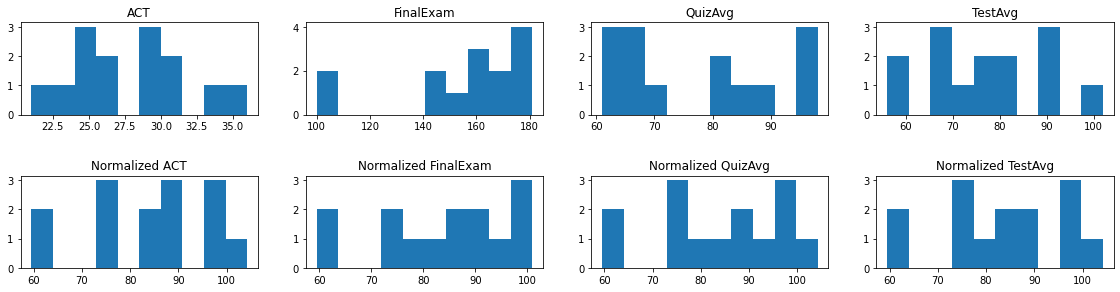

In [37]:
fig, ax = pyplot.subplots(2, 4)
fig.set_figwidth(16)
fig.tight_layout(h_pad=4)

columns = ["ACT", "FinalExam", "QuizAvg", "TestAvg"]
for i in range(0, len(columns)):
    column = columns[i]
    
    df[column].plot(ax=ax[0, i], kind="hist", title=column);
    ax[0, i].set_ylabel("")

    qnorm_df[column].plot(ax=ax[1, i], kind="hist", title="Normalized " + column);
    ax[1, i].set_ylabel("") 

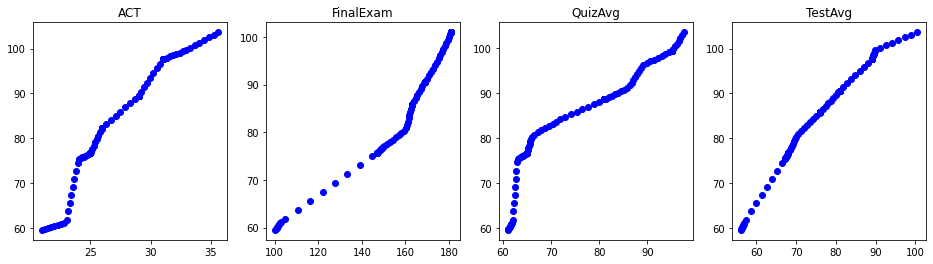

In [38]:
fig, ax = pyplot.subplots(1, 4)
fig.set_figwidth(16)

for i in range(0, 4):
    
    column_name = df.columns[i]
    raw = df[column_name]
    normalized = qnorm_df[column_name]
    
    for q in [x / 100 for x in range(0, 100)]:
        raw_quantile = numpy.quantile(raw, q)
        normalized_quantile = numpy.quantile(normalized, q)
        ax[i].scatter(raw_quantile, normalized_quantile, c="blue")
        
    ax[i].set_title(column_name)